In [253]:
import pandas as pd
import numpy as np
import seaborn as sns
import rdkit
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
#from mordred import Calculator, descriptors
from rdkit.Chem import MACCSkeys
from rdkit.Chem import rdFingerprintGenerator
import matplotlib.pyplot as plt


from sklearn import svm, ensemble, metrics, clone
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import auc, accuracy_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix


In [254]:
df = pd.read_csv("pIC50.csv")
df

,cid,smiles,bioactivity,type,value (nM),pIC50
0,127024762,C[C@@H](CO)Nc1nc2ccccc2nc1N1CCN(Cc2cc(Cl)ccc2C...,Active,IC50,1570.0,5.804100
1,127024157,C[C@@H]1C[C@H]1Nc1nc2cnncc2nc1N1CCC([C@@H](F)c...,Active,IC50,145.0,6.838632
2,155525744,C[C@H](CO)Nc1nc2ccccc2nc1N1CCN(Cc2cc(Cl)ccc2Cl...,Active,IC50,1570.0,5.804100
3,90038419,c1ccc2nc(N3CCN(Cc4coc5ccccc45)CC3)c(NC3CC3)nc2c1,Active,IC50,3960.0,5.402305
4,90038865,CC(=O)c1ccc(OC2CCN(c3nc4cnccc4nc3NC3CC3)CC2)cc...,Active,IC50,1740.0,5.759451
...,...,...,...,...,...,...
401,127024707,O=C(O)C(F)(F)F.O=C(c1nccc2nc(NC3CC3)c(N3CCC([C...,Active,IC50,6.0,8.221849
402,127024451,O=C(O)C(F)(F)F.Oc1ccc(OC2CCN(c3nc4ccncc4nc3NC3...,Active,IC50,54.0,7.267606
403,90038663,O=S(=O)(c1ccccc1)N1CCN(c2nc3cc(F)ccc3nc2NC2CC2...,Active,IC50,9440.0,5.025028
404,90037553,O=S(=O)(c1ccccc1)N1CCN(c2nc3ccccc3nc2NC2CC2)CC1,Active,IC50,5660.0,5.247184


In [255]:
#from sklearn.datasets import load_iris

In [256]:
#iris = load_iris()
#
#iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
#iris_df.head()
#iris_df.shape
#

In [257]:
#iris_X = np.array(iris_df)
#iris_X

In [258]:
    #iris_df['target'] = iris.target
    #iris_y = np.array(iris_df['target'])
    #iris_y.shape

<Figure size 2000x2000 with 0 Axes>

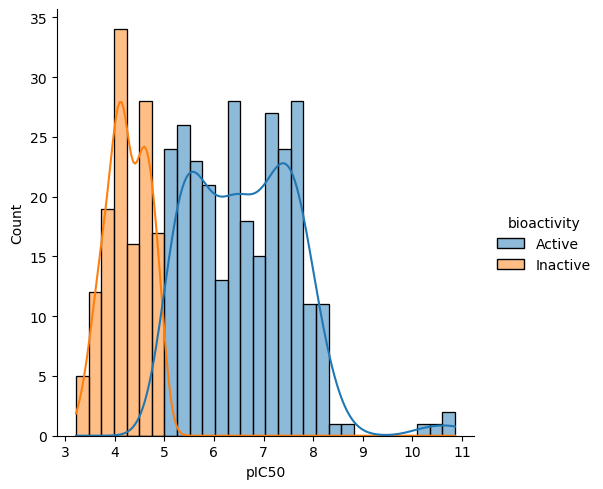

In [259]:
plt.figure(figsize=(20, 20))

sns.displot(df, bins=30, x='pIC50', hue='bioactivity', kde=True)
plt.show()

In [260]:
df2 = df[["cid", "smiles", "pIC50"]]
df2

,cid,smiles,pIC50
0,127024762,C[C@@H](CO)Nc1nc2ccccc2nc1N1CCN(Cc2cc(Cl)ccc2C...,5.804100
1,127024157,C[C@@H]1C[C@H]1Nc1nc2cnncc2nc1N1CCC([C@@H](F)c...,6.838632
2,155525744,C[C@H](CO)Nc1nc2ccccc2nc1N1CCN(Cc2cc(Cl)ccc2Cl...,5.804100
3,90038419,c1ccc2nc(N3CCN(Cc4coc5ccccc45)CC3)c(NC3CC3)nc2c1,5.402305
4,90038865,CC(=O)c1ccc(OC2CCN(c3nc4cnccc4nc3NC3CC3)CC2)cc...,5.759451
...,...,...,...
401,127024707,O=C(O)C(F)(F)F.O=C(c1nccc2nc(NC3CC3)c(N3CCC([C...,8.221849
402,127024451,O=C(O)C(F)(F)F.Oc1ccc(OC2CCN(c3nc4ccncc4nc3NC3...,7.267606
403,90038663,O=S(=O)(c1ccccc1)N1CCN(c2nc3cc(F)ccc3nc2NC2CC2...,5.025028
404,90037553,O=S(=O)(c1ccccc1)N1CCN(c2nc3ccccc3nc2NC2CC2)CC1,5.247184


In [261]:
df2["activity_label"] = np.zeros(len(df2))

df2.loc[df2[df2.pIC50 >= 5].index, "activity_label"] = 1.0

print("Number of active molecules:", int(df2.activity_label.sum()))
print("Number of inactive molecules:", len(df2) - int(df2.activity_label.sum()))

df

Number of active molecules: 275
Number of inactive molecules: 131


C:\Users\supak\AppData\Local\Temp\ipykernel_18712\901482849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["activity_label"] = np.zeros(len(df2))


,cid,smiles,bioactivity,type,value (nM),pIC50
0,127024762,C[C@@H](CO)Nc1nc2ccccc2nc1N1CCN(Cc2cc(Cl)ccc2C...,Active,IC50,1570.0,5.804100
1,127024157,C[C@@H]1C[C@H]1Nc1nc2cnncc2nc1N1CCC([C@@H](F)c...,Active,IC50,145.0,6.838632
2,155525744,C[C@H](CO)Nc1nc2ccccc2nc1N1CCN(Cc2cc(Cl)ccc2Cl...,Active,IC50,1570.0,5.804100
3,90038419,c1ccc2nc(N3CCN(Cc4coc5ccccc45)CC3)c(NC3CC3)nc2c1,Active,IC50,3960.0,5.402305
4,90038865,CC(=O)c1ccc(OC2CCN(c3nc4cnccc4nc3NC3CC3)CC2)cc...,Active,IC50,1740.0,5.759451
...,...,...,...,...,...,...
401,127024707,O=C(O)C(F)(F)F.O=C(c1nccc2nc(NC3CC3)c(N3CCC([C...,Active,IC50,6.0,8.221849
402,127024451,O=C(O)C(F)(F)F.Oc1ccc(OC2CCN(c3nc4ccncc4nc3NC3...,Active,IC50,54.0,7.267606
403,90038663,O=S(=O)(c1ccccc1)N1CCN(c2nc3cc(F)ccc3nc2NC2CC2...,Active,IC50,9440.0,5.025028
404,90037553,O=S(=O)(c1ccccc1)N1CCN(c2nc3ccccc3nc2NC2CC2)CC1,Active,IC50,5660.0,5.247184


Create Fingerprint

In [262]:
def fingerprints(smiles, method="maccs", n_bits=2048):

    # convert smiles to RDKit mol object
    mol = Chem.MolFromSmiles(smiles)

    if method == "maccs":
        return np.array(MACCSkeys.GenMACCSKeys(mol))
    if method == "morgan2":
        fpg = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=n_bits)
        return np.array(fpg.GetFingerprint(mol))
    if method == "morgan4":
        fpg = rdFingerprintGenerator.GetMorganGenerator(radius=4, fpSize=n_bits)
        return np.array(fpg.GetFingerprint(mol))
    else:
        # NBVAL_CHECK_OUTPUT
        print(f"Warning: Wrong method specified: {method}. Default will be used instead.")
        return np.array(MACCSkeys.GenMACCSKeys(mol))

In [263]:
compound_df = df2.copy()

compound_df["fp"] = compound_df["smiles"].apply(fingerprints)
compound_df

,cid,smiles,pIC50,activity_label,fp
0,127024762,C[C@@H](CO)Nc1nc2ccccc2nc1N1CCN(Cc2cc(Cl)ccc2C...,5.804100,1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,127024157,C[C@@H]1C[C@H]1Nc1nc2cnncc2nc1N1CCC([C@@H](F)c...,6.838632,1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,155525744,C[C@H](CO)Nc1nc2ccccc2nc1N1CCN(Cc2cc(Cl)ccc2Cl...,5.804100,1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,90038419,c1ccc2nc(N3CCN(Cc4coc5ccccc45)CC3)c(NC3CC3)nc2c1,5.402305,1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,90038865,CC(=O)c1ccc(OC2CCN(c3nc4cnccc4nc3NC3CC3)CC2)cc...,5.759451,1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...
401,127024707,O=C(O)C(F)(F)F.O=C(c1nccc2nc(NC3CC3)c(N3CCC([C...,8.221849,1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
402,127024451,O=C(O)C(F)(F)F.Oc1ccc(OC2CCN(c3nc4ccncc4nc3NC3...,7.267606,1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
403,90038663,O=S(=O)(c1ccccc1)N1CCN(c2nc3cc(F)ccc3nc2NC2CC2...,5.025028,1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
404,90037553,O=S(=O)(c1ccccc1)N1CCN(c2nc3ccccc3nc2NC2CC2)CC1,5.247184,1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [264]:
compounds_maccs = []

for _, smiles, bioactivity in df[['smiles', 'bioactivity']].itertuples():
    compounds_maccs.append((Chem.MolFromSmiles(smiles), bioactivity))
compounds_maccs[:5]

[(<rdkit.Chem.rdchem.Mol at 0x237d7b32810>, 'Active'),
 (<rdkit.Chem.rdchem.Mol at 0x237d7b338b0>, 'Active'),
 (<rdkit.Chem.rdchem.Mol at 0x237d7b33b50>, 'Active'),
 (<rdkit.Chem.rdchem.Mol at 0x237d7b33c30>, 'Active'),
 (<rdkit.Chem.rdchem.Mol at 0x237d7b333e0>, 'Active')]

In [265]:
compound_maccs_structure = pd.DataFrame(compounds_maccs, columns=["Structure", "bioactivity"])
compound_maccs_structure

,Structure,bioactivity
0,<rdkit.Chem.rdchem.Mol object at 0x00000237D7B...,Active
1,<rdkit.Chem.rdchem.Mol object at 0x00000237D7B...,Active
2,<rdkit.Chem.rdchem.Mol object at 0x00000237D7B...,Active
3,<rdkit.Chem.rdchem.Mol object at 0x00000237D7B...,Active
4,<rdkit.Chem.rdchem.Mol object at 0x00000237D7B...,Active
...,...,...
401,<rdkit.Chem.rdchem.Mol object at 0x00000237C3D...,Active
402,<rdkit.Chem.rdchem.Mol object at 0x00000237C3D...,Active
403,<rdkit.Chem.rdchem.Mol object at 0x00000237C3D...,Active
404,<rdkit.Chem.rdchem.Mol object at 0x00000237C3D...,Active


In [266]:
def generate_maccs(data):
    maccs_fingerprint = [MACCSkeys.GenMACCSKeys(mol) for mol in data]
    return maccs_fingerprint

maccsfp = generate_maccs(compound_maccs_structure.Structure[:])
print("Number of compounds converted:", len(maccsfp))
print("Fingerprint length per compound:", len(maccsfp[0]))

Number of compounds converted: 406
Fingerprint length per compound: 167


In [267]:
fp_name_maccs = [f'Bit_{i}' for i in range(167)]
fp_bits_maccs = [list(l) for l in maccsfp]

maccsfp_df = pd.DataFrame(fp_bits_maccs, index=df["bioactivity"], columns=fp_name_maccs)
maccsfp_df.reset_index(inplace=True)  # Reset index to bring "cid" back as a column
maccsfp_df.rename(columns={"index": "bioactivity"})# Rename the index column to "cid"
maccsfp_df.head()

,bioactivity,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,...,Bit_157,Bit_158,Bit_159,Bit_160,Bit_161,Bit_162,Bit_163,Bit_164,Bit_165,Bit_166
0,Active,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,Active,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,Active,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,Active,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0
4,Active,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [268]:
maccsfp_df_umap = maccsfp_df.iloc[:, 1:]
maccsfp_df_umap

,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,Bit_9,...,Bit_157,Bit_158,Bit_159,Bit_160,Bit_161,Bit_162,Bit_163,Bit_164,Bit_165,Bit_166
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,1
402,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,1
403,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,1,0
404,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,1,0


In [269]:
import umap.umap_ as umap
import umap.plot

In [270]:
umapper = umap.UMAP(n_neighbors=20, 
                    n_components=5,
                    metric='euclidean', 
                    random_state=42
                    )

data_umap_maccs = umapper.fit_transform(maccsfp_df_umap)

data_umap_maccs_x = pd.DataFrame(data_umap_maccs[:, 0], columns = ['x'])
data_umap_maccs_y = pd.DataFrame(data_umap_maccs[:, 1], columns = ['y'])
bioactivity = pd.DataFrame(maccsfp_df["bioactivity"].values, columns = ['bioactivity'])
plot_umap_maccs = pd.concat([bioactivity, data_umap_maccs_x, data_umap_maccs_y], axis = 1)
plot_umap_maccs

,bioactivity,x,y
0,Active,12.636414,3.554885
1,Active,12.439086,6.667742
2,Active,12.573221,3.466357
3,Active,12.394393,2.652940
4,Active,10.064184,-0.199352
...,...,...,...
401,Active,11.244129,-0.102784
402,Active,9.864250,-0.281331
403,Active,6.714610,13.494921
404,Active,6.700478,13.494313


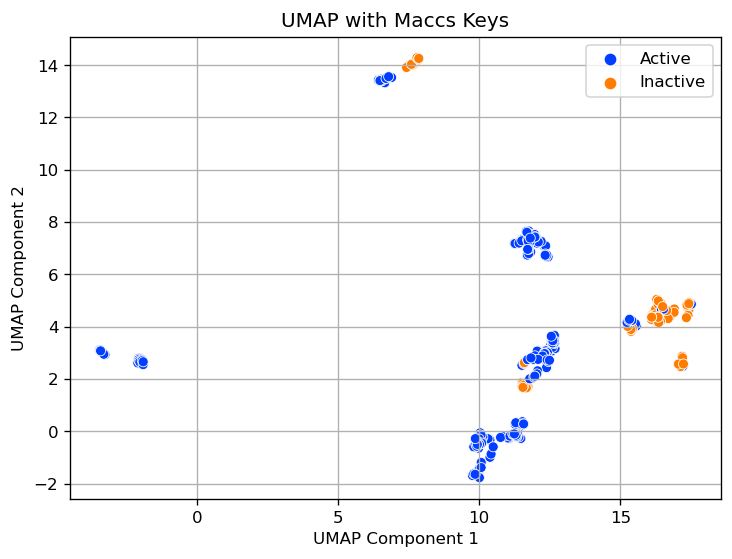

In [271]:
plt.figure(figsize = (7, 5), dpi=120)
sns.scatterplot(x='x', y='y', hue='bioactivity', data=plot_umap_maccs, palette='bright')
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.grid()
plt.legend()
plt.title('UMAP with Maccs Keys', fontsize=12)
plt.show()

ML Functions for Fingerprint

In [272]:
#Plot Data
def plot_curve_functions(models, test_x, test_y):
    
    fig, ax = plt.subplots()
    
    
    #Loop iterates model list
    for model in models:
        
        #Select model
        ml_model = model["model"]
        
        #Predict test probability
        test_prob = ml_model.predict_proba(test_x)[:, 1]
        
        #Predict class on test set
        test_pred = ml_model.predict(test_x)
        
        #Compute False/True postitive rate
        fpr, tpr, thresholds = metrics.roc_curve(test_y, test_prob)
        
        #Calculate AUC
        auc = roc_auc_score(test_y, test_prob)
        
        ax.plot(fpr, tpr, label=(f"{model['label']} AUC area = {auc:.5f}"))
    
    ax.plot([0, 1], [0, 1], "r--")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title("Receiver Operating Characteristic")
    ax.legend(loc="lower right")

    #if save_png:
        #fig.savefig(dpi=300, bbox_inches="tight", transparent=True)
    #return fig

In [273]:
def model_performance(ml_model, test_x, test_y, verbose=True):
    
    #Predict probability on test set
    test_prob = ml_model.predict_proba(test_x)[:, 1]
    
    #Predict class on test set
    test_pred = ml_model.predict(test_x)
    
    #Performance of test set
    accuracy = accuracy_score(test_y, test_pred)
    sens = recall_score(test_y, test_pred)#, average='macro') # In case of Multi class, change a binary to micro, macro, weighted or None. pos_label is ignored
    spec = recall_score(test_y, test_pred, pos_label=0)#, average='macro)
    auc = roc_auc_score(test_y, test_prob)#,multi_class='ovr') # in case of Multi class, put function "multi_class = ovr or ovo"
    cm = confusion_matrix(test_y, test_pred)
    
    if verbose:
        print(f"Accuracy: {accuracy:.5f}")
        print(f"Sensitivity: {sens:.5f}")
        print(f"Specificity: {spec:.5f}")
        print(f"AUC: {auc:.5f}")
        print(f"Confusion Matrix: {cm}")

    return accuracy, sens, spec, auc, cm

In [274]:
def model_training_and_validation(ml_model, name, splits, verbose=True):

    train_x, test_x, train_y, test_y = splits

    #Fit model
    ml_model.fit(train_x, train_y)

    #Calculate performance results
    accuracy, sens, spec, auc, cm = model_performance(ml_model, test_x, test_y, verbose)
    
    sns.heatmap(cm, annot=True)
    plt.xlabel('predicted')
    plt.ylabel('Truth')
    
    return accuracy, sens, spec, auc, cm

Split Data

In [339]:
from sklearn.model_selection import StratifiedShuffleSplit

In [378]:
X = np.array(compound_df.fp.tolist())
y = np.array(compound_df.activity_label.tolist())

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.8, random_state=42)

sss.get_n_splits(fp_to_model, label_to_model)

10

In [379]:
scores = []

rf = RandomForestClassifier(n_estimators=100, max_depth=3, criterion='gini')

for train_index, test_index in sss.split(X, y):
    static_train_x, static_test_x = X[train_index], X[test_index]
    static_train_y, static_test_y = y[train_index], y[test_index]
    rf.fit(static_train_x, static_train_y)
    pred = rf.predict(static_test_x)
    scores.append(accuracy_score(static_test_y, pred))
    
print(scores)

[0.9446153846153846, 0.9046153846153846, 0.9507692307692308, 0.9476923076923077, 0.916923076923077, 0.9569230769230769, 0.9507692307692308, 0.9384615384615385, 0.9384615384615385, 0.9384615384615385]


In [380]:
print(compound_df.fp.iloc[train_index])

44     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
228    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
166    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
27     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...
2      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                             ...                        
203    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
285    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
66     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
169    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
194    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: fp, Length: 81, dtype: object


In [275]:
fp_to_model = compound_df.fp.tolist()
label_to_model = compound_df.activity_label.tolist()


(static_train_x, 
 static_test_x, 
 static_train_y,
 static_test_y) = train_test_split(fp_to_model, label_to_model, 
                                   test_size=0.2, random_state=42)

splits = [static_train_x, static_test_x, static_train_y, static_test_y]

print("Training data size:", len(static_train_x))
print("Test data size:", len(static_test_x))


Training data size: 324
Test data size: 82


Random Forest

In [276]:
param = {
    "n_estimators": 100,  # number of trees to grows
    "criterion": "entropy"
    #"max_depth": 3 # cost function to be optimized for a split
}
model_RF = RandomForestClassifier()

Accuracy: 0.95122
Sensitivity: 0.94118
Specificity: 0.96774
AUC: 0.96363
Confusion Matrix: [[30  1]
 [ 3 48]]


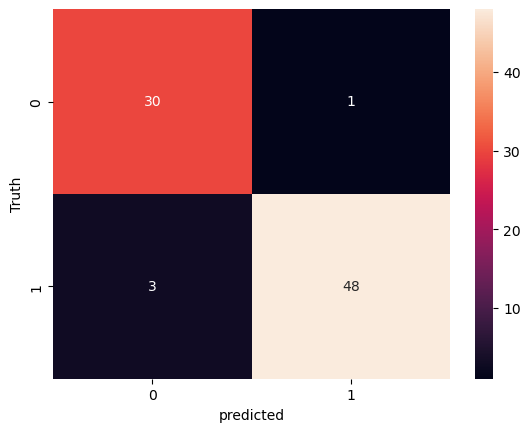

In [277]:
performance_measures = model_training_and_validation(model_RF, "RF", splits)

In [278]:
#feature_iris = pd.Series(model_RF.feature_importances_, index=compound_df.fp).sort_values(ascending=False)
#feature_iris

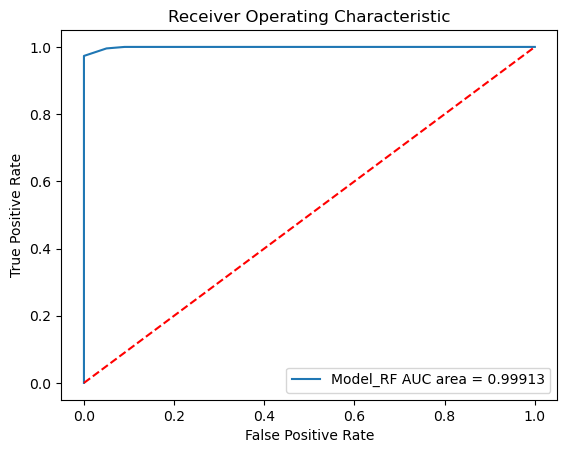

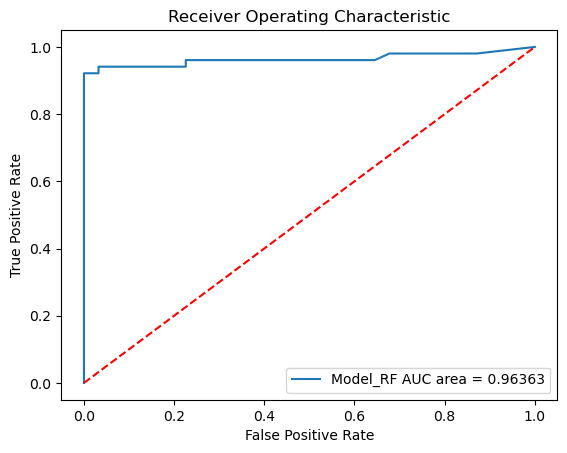

In [279]:
models = [{"label": "Model_RF", "model": model_RF}]

# Plot roc curve
plot_curve_functions(models, static_train_x, static_train_y)
plot_curve_functions(models, static_test_x, static_test_y)

SVM

Accuracy: 0.93902
Sensitivity: 0.94118
Specificity: 0.93548
AUC: 0.97249
Confusion Matrix: [[29  2]
 [ 3 48]]


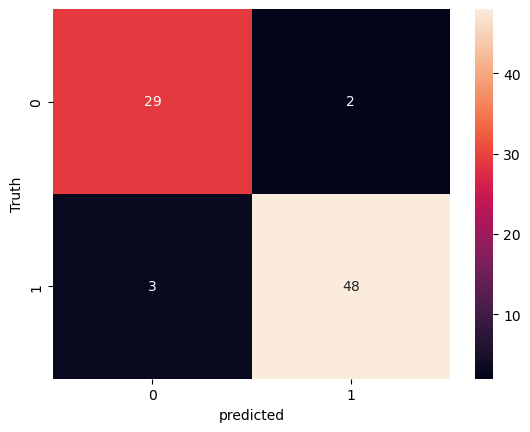

In [280]:
model_SVM = svm.SVC(kernel="linear", C=1, gamma='scale', probability=True)

# Fit model on single split
performance_measures = model_training_and_validation(model_SVM, "SVM", splits)

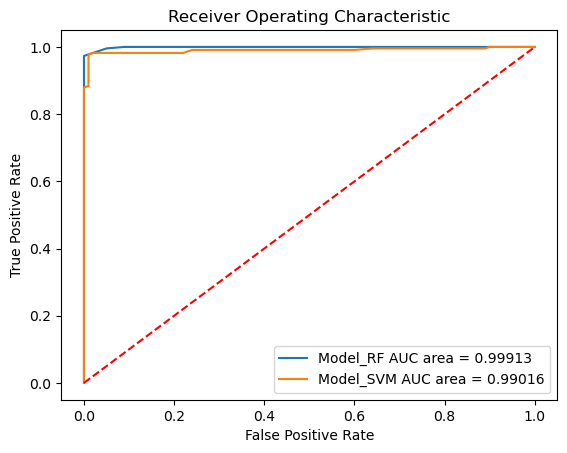

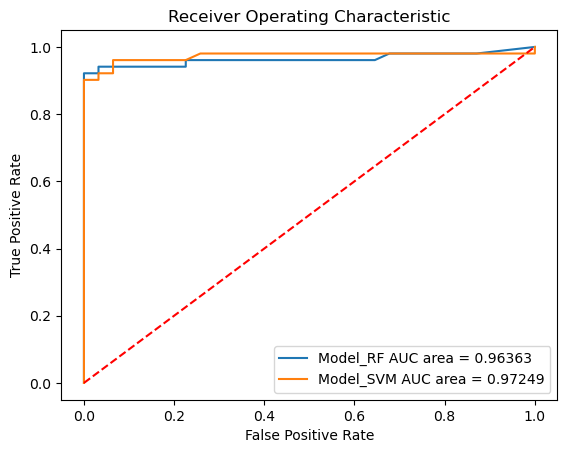

In [281]:
models.append({"label": "Model_SVM", "model": model_SVM})

# Plot roc curve
plot_curve_functions(models, static_train_x, static_train_y)
plot_curve_functions(models, static_test_x, static_test_y)

Gradient Boosting

In [282]:
from sklearn.ensemble import GradientBoostingClassifier

Accuracy: 0.95122
Sensitivity: 0.94118
Specificity: 0.96774
AUC: 0.97375
Confusion Matrix: [[30  1]
 [ 3 48]]


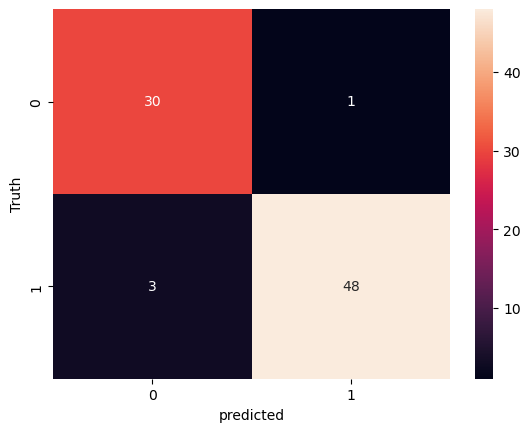

In [283]:
model_GB = GradientBoostingClassifier(n_estimators=100,
                                     learning_rate=0.1,
                                     criterion='friedman_mse',
                                     max_depth=3)

performance_measures = model_training_and_validation(model_GB, "GB", splits)

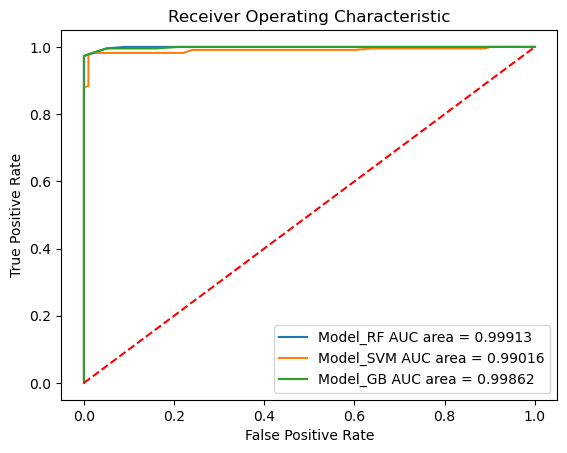

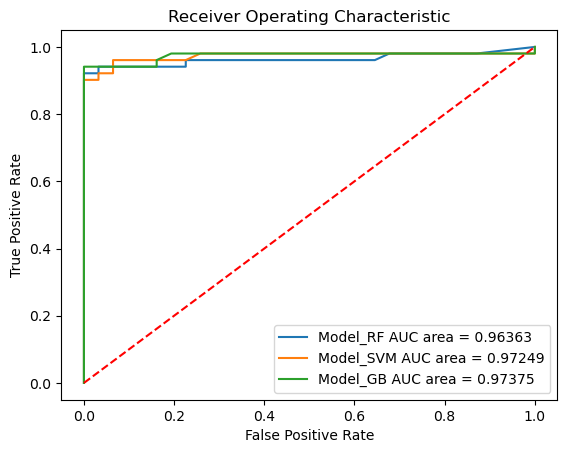

In [284]:
models.append({"label": "Model_GB", "model": model_GB})

plot_curve_functions(models, static_train_x, static_train_y)
plot_curve_functions(models, static_test_x, static_test_y)

ANN

Accuracy: 0.92683
Sensitivity: 0.94118
Specificity: 0.90323
AUC: 0.94719
Confusion Matrix: [[28  3]
 [ 3 48]]


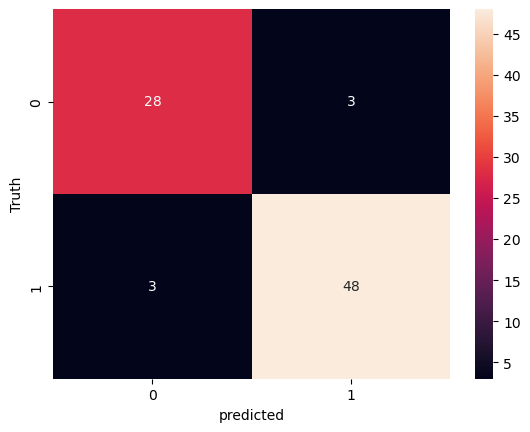

In [285]:
model_ANN = MLPClassifier(hidden_layer_sizes=(3, ), 
                          activation='logistic',
                          solver='lbfgs', 
                          alpha=0.0001, 
                          max_iter=400
                          )

performance_measures = model_training_and_validation(model_ANN, "ANN", splits)

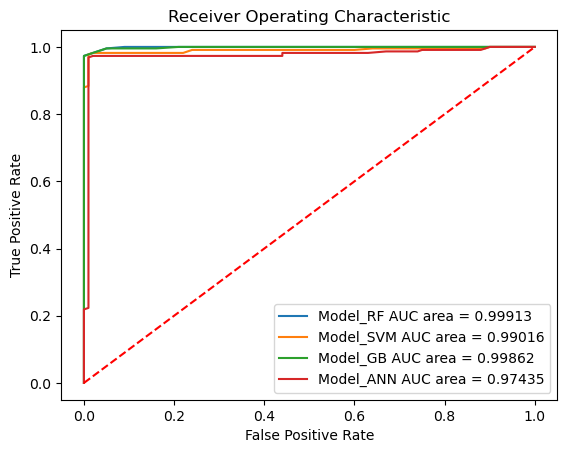

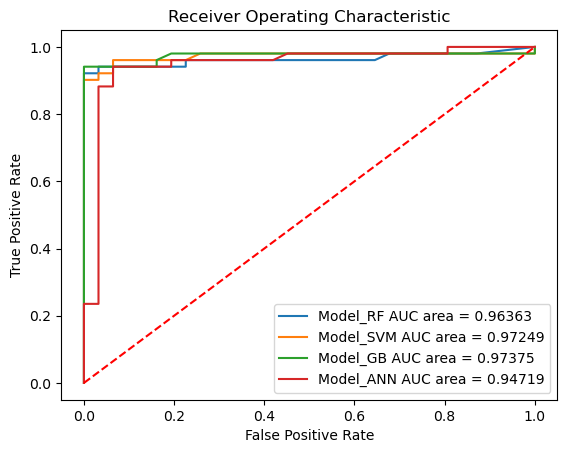

In [286]:
# Append ANN model
models.append({"label": "Model_ANN", "model": model_ANN})

# Plot roc curve
plot_curve_functions(models, static_train_x, static_train_y)
plot_curve_functions(models, static_test_x, static_test_y)

Classification Using Molecular Features

In [287]:
df2

,cid,smiles,pIC50,activity_label
0,127024762,C[C@@H](CO)Nc1nc2ccccc2nc1N1CCN(Cc2cc(Cl)ccc2C...,5.804100,1.0
1,127024157,C[C@@H]1C[C@H]1Nc1nc2cnncc2nc1N1CCC([C@@H](F)c...,6.838632,1.0
2,155525744,C[C@H](CO)Nc1nc2ccccc2nc1N1CCN(Cc2cc(Cl)ccc2Cl...,5.804100,1.0
3,90038419,c1ccc2nc(N3CCN(Cc4coc5ccccc45)CC3)c(NC3CC3)nc2c1,5.402305,1.0
4,90038865,CC(=O)c1ccc(OC2CCN(c3nc4cnccc4nc3NC3CC3)CC2)cc...,5.759451,1.0
...,...,...,...,...
401,127024707,O=C(O)C(F)(F)F.O=C(c1nccc2nc(NC3CC3)c(N3CCC([C...,8.221849,1.0
402,127024451,O=C(O)C(F)(F)F.Oc1ccc(OC2CCN(c3nc4ccncc4nc3NC3...,7.267606,1.0
403,90038663,O=S(=O)(c1ccccc1)N1CCN(c2nc3cc(F)ccc3nc2NC2CC2...,5.025028,1.0
404,90037553,O=S(=O)(c1ccccc1)N1CCN(c2nc3ccccc3nc2NC2CC2)CC1,5.247184,1.0


In [288]:
smile = [Chem.MolFromSmiles(i) for i in df2.smiles]
mol = [m for m in smile]
len(mol)

406

In [289]:
print(len(Descriptors._descList))
print(Descriptors._descList[:5])

209
[('MaxAbsEStateIndex', <function MaxAbsEStateIndex at 0x00000237C0C3C790>), ('MaxEStateIndex', <function MaxEStateIndex at 0x00000237C0C3C670>), ('MinAbsEStateIndex', <function MinAbsEStateIndex at 0x00000237C0C3C820>), ('MinEStateIndex', <function MinEStateIndex at 0x00000237C0C3C700>), ('qed', <function qed at 0x00000237C0C3F5B0>)]


In [290]:
descriptors = [Descriptors.CalcMolDescriptors(i) for i in mol]
rdkit_gpr6 = pd.DataFrame(descriptors)
rdkit_gpr6

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,10.578704,10.578704,0.029880,-5.083333,0.399686,560.404,534.196,559.136480,200,0,...,0,0,0,0,0,0,0,0,0,0
1,15.017304,15.017304,0.075002,-5.083333,0.430629,542.484,518.292,542.186493,204,0,...,0,0,0,0,0,0,0,0,0,0
2,10.578704,10.578704,0.029880,-5.083333,0.399686,560.404,534.196,559.136480,200,0,...,0,0,0,0,0,0,0,0,0,0
3,5.716872,5.716872,0.550809,0.550809,0.540799,399.498,374.298,399.205910,152,0,...,0,0,0,0,0,0,0,0,0,0
4,11.431104,11.431104,0.066818,-5.083333,0.456399,517.508,491.300,517.193689,196,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,15.248740,15.248740,0.107614,-5.083333,0.362385,640.585,610.345,640.223273,242,0,...,0,0,0,0,0,0,0,0,0,0
402,13.948646,13.948646,0.080787,-5.083333,0.436243,509.460,486.276,509.168617,192,0,...,0,0,0,0,0,0,0,0,0,0
403,13.704517,13.704517,0.301399,-3.521641,0.674721,427.505,405.329,427.147824,156,0,...,0,1,0,0,0,0,0,0,0,0
404,12.892994,12.892994,0.342626,-3.466435,0.698143,409.515,386.331,409.157246,150,0,...,0,1,0,0,0,0,0,0,0,0


In [291]:
rdkit_gpr6.describe()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.0,...,406.000000,406.000000,406.000000,406.0,406.0,406.0,406.0,406.000000,406.000000,406.000000
mean,13.407435,13.407435,0.146775,-2.906237,0.551806,490.560377,465.303273,490.068246,181.921182,0.0,...,0.007389,0.068966,0.019704,0.0,0.0,0.0,0.0,0.022167,0.022167,0.054187
std,1.594267,1.594267,0.162150,2.097198,0.142109,77.633891,74.900296,77.514098,30.455532,0.0,...,0.085748,0.253708,0.139154,0.0,0.0,0.0,0.0,0.147410,0.163303,0.226666
min,4.871601,4.871601,0.000000,-5.083333,0.243006,253.308000,246.252000,252.997968,82.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,13.003812,13.003812,0.040100,-5.083333,0.434120,457.531250,428.293000,457.233928,172.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,13.966414,13.966414,0.082684,-3.226666,0.554611,502.816000,472.048500,502.228169,190.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
75%,14.176661,14.176661,0.202477,-0.682752,0.678792,538.844000,513.289750,538.190170,198.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
max,15.248740,15.248740,0.786402,0.716349,0.802254,656.641000,629.821000,656.248264,248.000000,0.0,...,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,2.000000,1.000000


In [292]:
df_descriptor = df2.copy()
df_dataset = df_descriptor[['activity_label']].join(rdkit_gpr6)
df_dataset

,activity_label,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,1.0,10.578704,10.578704,0.029880,-5.083333,0.399686,560.404,534.196,559.136480,200,...,0,0,0,0,0,0,0,0,0,0
1,1.0,15.017304,15.017304,0.075002,-5.083333,0.430629,542.484,518.292,542.186493,204,...,0,0,0,0,0,0,0,0,0,0
2,1.0,10.578704,10.578704,0.029880,-5.083333,0.399686,560.404,534.196,559.136480,200,...,0,0,0,0,0,0,0,0,0,0
3,1.0,5.716872,5.716872,0.550809,0.550809,0.540799,399.498,374.298,399.205910,152,...,0,0,0,0,0,0,0,0,0,0
4,1.0,11.431104,11.431104,0.066818,-5.083333,0.456399,517.508,491.300,517.193689,196,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,1.0,15.248740,15.248740,0.107614,-5.083333,0.362385,640.585,610.345,640.223273,242,...,0,0,0,0,0,0,0,0,0,0
402,1.0,13.948646,13.948646,0.080787,-5.083333,0.436243,509.460,486.276,509.168617,192,...,0,0,0,0,0,0,0,0,0,0
403,1.0,13.704517,13.704517,0.301399,-3.521641,0.674721,427.505,405.329,427.147824,156,...,0,1,0,0,0,0,0,0,0,0
404,1.0,12.892994,12.892994,0.342626,-3.466435,0.698143,409.515,386.331,409.157246,150,...,0,1,0,0,0,0,0,0,0,0


Split Train Test set

In [293]:
(feature_train_x, 
 feature_test_x, 
 feature_train_y,
 feature_test_y) = train_test_split(df_dataset.drop(['activity_label'], axis=1).values, 
                                    df_dataset['activity_label'].values, 
                                   test_size=0.2, random_state=42)

print("Training data size:", len(feature_train_x))
print("Test data size:", len(feature_test_x))
print(feature_train_x.shape)
print(feature_train_y.shape)


Training data size: 324
Test data size: 82
(324, 209)
(324,)


Standardization

In [294]:
from sklearn import preprocessing

In [295]:
scaler = preprocessing.StandardScaler()
scaler.fit(feature_train_x)

sd_train_x = scaler.transform(feature_train_x)
sd_train_x

array([[-0.23393852, -0.23393852, -0.66542453, ..., -0.15911146,
        -0.14195469, -0.22032632],
       [-4.570716  , -4.570716  ,  2.44498116, ..., -0.15911146,
        -0.14195469, -0.22032632],
       [ 0.37623754,  0.37623754, -0.79017458, ..., -0.15911146,
        -0.14195469, -0.22032632],
       ...,
       [ 0.55253372,  0.55253372, -0.80610906, ..., -0.15911146,
        -0.14195469, -0.22032632],
       [-1.66058323, -1.66058323,  1.82931695, ..., -0.15911146,
        -0.14195469, -0.22032632],
       [ 0.40129034,  0.40129034, -0.91919714, ..., -0.15911146,
        -0.14195469, -0.22032632]])

In [296]:
sd_test_x = scaler.transform(feature_test_x)
sd_test_x

array([[ 0.37186969,  0.37186969, -0.71876737, ..., -0.15911146,
        -0.14195469,  4.53872229],
       [ 0.63362985,  0.63362985,  0.10499047, ..., -0.15911146,
        -0.14195469, -0.22032632],
       [ 0.397112  ,  0.397112  , -0.52641986, ..., -0.15911146,
         5.60721018,  4.53872229],
       ...,
       [ 0.45446778,  0.45446778,  0.8879544 , ..., -0.15911146,
        -0.14195469, -0.22032632],
       [-0.55308487, -0.55308487, -0.39085497, ..., -0.15911146,
        -0.14195469, -0.22032632],
       [ 1.06958543,  1.06958543, -0.3602786 , ..., -0.15911146,
        -0.14195469, -0.22032632]])

In [297]:
df_sd_train_x = pd.DataFrame(sd_train_x, columns=rdkit_gpr6.columns)
df_sd_train_x.describe()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,3.240000e+02,3.240000e+02,3.240000e+02,3.240000e+02,3.240000e+02,3.240000e+02,3.240000e+02,3.240000e+02,3.240000e+02,324.0,...,3.240000e+02,3.240000e+02,3.240000e+02,324.0,324.0,324.0,324.0,324.000000,3.240000e+02,3.240000e+02
mean,-5.351001e-15,-5.351001e-15,5.811538e-16,1.447402e-15,1.250029e-15,-3.761052e-15,1.891491e-15,7.864765e-15,-2.028556e-16,0.0,...,-5.482583e-18,1.096517e-17,3.289550e-17,0.0,0.0,0.0,0.0,0.000000,1.644775e-17,2.741291e-18
std,1.001547e+00,1.001547e+00,1.001547e+00,1.001547e+00,1.001547e+00,1.001547e+00,1.001547e+00,1.001547e+00,1.001547e+00,0.0,...,1.001547e+00,1.001547e+00,1.001547e+00,0.0,0.0,0.0,0.0,1.001547,1.001547e+00,1.001547e+00
min,-5.076667e+00,-5.076667e+00,-9.191971e-01,-1.044373e+00,-2.194870e+00,-3.030833e+00,-2.904534e+00,-3.032770e+00,-3.233559e+00,0.0,...,-7.881104e-02,-2.495898e-01,-1.591115e-01,0.0,0.0,0.0,0.0,-0.159111,-1.419547e-01,-2.203263e-01
25%,-2.507154e-01,-2.507154e-01,-6.675103e-01,-1.044373e+00,-8.210300e-01,-4.102539e-01,-4.733632e-01,-4.113351e-01,-3.115664e-01,0.0,...,-7.881104e-02,-2.495898e-01,-1.591115e-01,0.0,0.0,0.0,0.0,-0.159111,-1.419547e-01,-2.203263e-01
50%,3.636281e-01,3.636281e-01,-3.868746e-01,-1.207096e-01,-2.544866e-02,1.703402e-01,1.040020e-01,1.728512e-01,2.924210e-01,0.0,...,-7.881104e-02,-2.495898e-01,-1.591115e-01,0.0,0.0,0.0,0.0,-0.159111,-1.419547e-01,-2.203263e-01
75%,4.914689e-01,4.914689e-01,3.409171e-01,1.051241e+00,9.023325e-01,6.098611e-01,6.594076e-01,6.114367e-01,5.536047e-01,0.0,...,-7.881104e-02,-2.495898e-01,-1.591115e-01,0.0,0.0,0.0,0.0,-0.159111,-1.419547e-01,-2.203263e-01
max,1.134747e+00,1.134747e+00,3.758618e+00,1.715202e+00,1.802728e+00,2.170695e+00,2.229120e+00,2.175001e+00,2.186003e+00,0.0,...,1.268858e+01,4.006574e+00,6.284903e+00,0.0,0.0,0.0,0.0,6.284903,1.135638e+01,4.538722e+00


In [298]:
df_sd_test_x = pd.DataFrame(sd_test_x, columns=rdkit_gpr6.columns)
df_sd_test_x.describe()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.0,...,82.000000,82.000000,8.200000e+01,82.0,82.0,82.0,82.0,82.000000,82.000000,82.000000
mean,0.161422,0.161422,-0.112581,-0.041977,-0.023222,0.142888,0.134816,0.142947,0.141922,0.0,...,0.076889,0.217550,-1.591115e-01,0.0,0.0,0.0,0.0,-0.080526,-0.071843,0.185934
std,0.729494,0.729494,0.945444,0.988624,1.121813,0.997727,1.004956,0.997019,0.962809,0.0,...,1.409922,1.338602,1.954847e-16,0.0,0.0,0.0,0.0,0.711622,0.634889,1.337982
min,-1.660583,-1.660583,-0.919197,-1.044373,-2.233231,-2.888625,-2.770441,-2.890504,-3.102968,0.0,...,-0.078811,-0.249590,-1.591115e-01,0.0,0.0,0.0,0.0,-0.159111,-0.141955,-0.220326
25%,-0.109762,-0.109762,-0.689362,-1.044373,-1.014323,-0.364759,-0.448703,-0.362757,-0.099355,0.0,...,-0.078811,-0.249590,-1.591115e-01,0.0,0.0,0.0,0.0,-0.159111,-0.141955,-0.220326
50%,0.379170,0.379170,-0.500846,-0.213111,0.060316,0.260163,0.207968,0.262997,0.423013,0.0,...,-0.078811,-0.249590,-1.591115e-01,0.0,0.0,0.0,0.0,-0.159111,-0.141955,-0.220326
75%,0.497233,0.497233,0.136678,1.045974,0.980721,0.694381,0.728793,0.688888,0.618901,0.0,...,-0.078811,-0.249590,-1.591115e-01,0.0,0.0,0.0,0.0,-0.159111,-0.141955,-0.220326
max,1.134747,1.134747,3.883914,1.374353,1.562237,1.963631,1.968749,1.968046,1.990115,0.0,...,12.688578,4.006574,-1.591115e-01,0.0,0.0,0.0,0.0,6.284903,5.607210,4.538722


In [299]:
df_feature_train_y = pd.DataFrame(feature_train_y, columns=['activity_label'])
df_feature_test_y = pd.DataFrame(feature_test_y, columns=['activity_label'])

In [300]:
df_train_set = df_feature_train_y.join(df_sd_train_x)
df_train_set

,activity_label,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,1.0,-0.233939,-0.233939,-0.665425,-1.044373,-1.017555,1.006630,1.069711,0.997786,0.292421,...,-0.078811,-0.24959,-0.159111,0.0,0.0,0.0,0.0,-0.159111,-0.141955,-0.220326
1,1.0,-4.570716,-4.570716,2.444981,1.636436,-0.084126,-1.145514,-1.190778,-1.144569,-0.948202,...,-0.078811,-0.24959,-0.159111,0.0,0.0,0.0,0.0,-0.159111,-0.141955,-0.220326
2,0.0,0.376238,0.376238,-0.790175,1.042499,0.992967,-0.190848,-0.253984,-0.188666,0.031237,...,-0.078811,-0.24959,-0.159111,0.0,0.0,0.0,0.0,-0.159111,-0.141955,-0.220326
3,1.0,0.996217,0.996217,-0.461107,-1.044373,-0.879196,0.698485,0.736425,0.701952,0.749493,...,-0.078811,-0.24959,-0.159111,0.0,0.0,0.0,0.0,-0.159111,-0.141955,-0.220326
4,1.0,0.529182,0.529182,-0.519944,-1.044373,-0.988559,0.673131,0.656149,0.676437,0.814788,...,-0.078811,-0.24959,-0.159111,0.0,0.0,0.0,0.0,-0.159111,-0.141955,-0.220326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,0.0,0.390783,0.390783,-0.704629,1.047149,0.916158,0.003358,-0.119891,0.005662,0.292421,...,-0.078811,-0.24959,-0.159111,0.0,0.0,0.0,0.0,-0.159111,-0.141955,4.538722
320,1.0,0.305126,0.305126,-0.381887,-1.044373,-0.598895,0.324271,0.348064,0.327347,0.423013,...,-0.078811,-0.24959,-0.159111,0.0,0.0,0.0,0.0,-0.159111,-0.141955,-0.220326
321,1.0,0.552534,0.552534,-0.806109,-1.044373,-1.523269,0.673453,0.710447,0.675738,0.553605,...,12.688578,-0.24959,-0.159111,0.0,0.0,0.0,0.0,-0.159111,-0.141955,-0.220326
322,1.0,-1.660583,-1.660583,1.829317,-1.044373,-0.911654,1.019798,1.083376,1.011056,0.618901,...,-0.078811,-0.24959,-0.159111,0.0,0.0,0.0,0.0,-0.159111,-0.141955,-0.220326


In [301]:
df_test_set = df_feature_test_y.join(df_sd_test_x)
df_test_set

,activity_label,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.0,0.371870,0.371870,-0.718767,1.047536,1.159592,-0.177539,-0.280645,-0.175343,0.096533,...,-0.078811,-0.24959,-0.159111,0.0,0.0,0.0,0.0,-0.159111,-0.141955,4.538722
1,1.0,0.633630,0.633630,0.104990,-1.044373,-1.142205,1.357463,1.325879,1.361247,1.467748,...,-0.078811,-0.24959,-0.159111,0.0,0.0,0.0,0.0,-0.159111,-0.141955,-0.220326
2,0.0,0.397112,0.397112,-0.526420,1.042698,-0.139970,0.209687,0.094238,0.212228,0.488309,...,-0.078811,-0.24959,-0.159111,0.0,0.0,0.0,0.0,-0.159111,5.607210,4.538722
3,0.0,0.373463,0.373463,-0.710684,1.046312,1.255727,-0.371178,-0.468113,-0.369201,-0.099355,...,-0.078811,-0.24959,-0.159111,0.0,0.0,0.0,0.0,-0.159111,-0.141955,-0.220326
4,1.0,0.346561,0.346561,-0.552698,1.041162,0.665210,-0.642762,-0.655528,-0.641007,-0.491130,...,-0.078811,-0.24959,-0.159111,0.0,0.0,0.0,0.0,-0.159111,-0.141955,-0.220326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.0,0.432288,0.432288,-0.674448,1.109539,1.029282,-0.202971,-0.334020,-0.200904,0.096533,...,-0.078811,-0.24959,-0.159111,0.0,0.0,0.0,0.0,-0.159111,-0.141955,-0.220326
78,1.0,0.033747,0.033747,-0.389155,0.926040,1.515926,-2.411356,-2.288620,-2.412648,-2.645896,...,-0.078811,-0.24959,-0.159111,0.0,0.0,0.0,0.0,-0.159111,-0.141955,-0.220326
79,1.0,0.454468,0.454468,0.887954,-1.044373,-1.962402,1.060073,1.125174,1.063477,1.010676,...,-0.078811,-0.24959,-0.159111,0.0,0.0,0.0,0.0,-0.159111,-0.141955,-0.220326
80,1.0,-0.553085,-0.553085,-0.390855,-0.734850,1.562237,-1.998454,-1.873598,-1.999304,-2.254120,...,-0.078811,-0.24959,-0.159111,0.0,0.0,0.0,0.0,-0.159111,-0.141955,-0.220326


In [302]:
feature_name = np.array(df_sd_train_x.columns)
feature_name

array(['MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex',
       'MinEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt',
       'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge',
       'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge',
       'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3',
       'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO',
       'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW',
       'AvgIpc', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1',
       'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n',
       'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3',
       'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12',
       'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4',
       'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9',
       'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4',
 

UMAP plot (Fingerprint VS Features)

ML function for features

In [303]:
def plot_curve_functions_feature(models, test_x, test_y):
    
    fig, ax = plt.subplots()
    
    
    #Loop iterates model list
    for model in models:
        
        #Select model
        ml_model = model["model"]
        
        #Predict test probability
        test_prob = ml_model.predict_proba(test_x)[:, 1]
        
        #Predict class on test set
        test_pred = ml_model.predict(test_x)
        
        #Compute False/True postitive rate
        fpr, tpr, thresholds = metrics.roc_curve(test_y, test_prob)
        
        #Calculate AUC
        auc = roc_auc_score(test_y, test_prob)
        
        ax.plot(fpr, tpr, label=(f"{model['label']} AUC area = {auc:.5f}"))
    
    ax.plot([0, 1], [0, 1], "r--")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title("Receiver Operating Characteristic")
    ax.legend(loc="lower right")

In [304]:
def model_performance_feature(ml_model, test_x, test_y, verbose=True):
    
    #Predict probability on test set
    test_prob = ml_model.predict_proba(test_x)[:, 1]
    
    #Predict class on test set
    test_pred = ml_model.predict(test_x)
    
    #Performance of test set
    accuracy = accuracy_score(test_y, test_pred)
    sens = recall_score(test_y, test_pred)#, average='macro') # In case of Multi class, change a binary to micro, macro, weighted or None. pos_label is ignored
    spec = recall_score(test_y, test_pred, pos_label=0)#, average='macro)
    auc = roc_auc_score(test_y, test_prob)#,multi_class='ovr') # in case of Multi class, put function "multi_class = ovr or ovo"
    cm = confusion_matrix(test_y, test_pred)
    
    if verbose:
        print(f"Accuracy: {accuracy:.5f}")
        print(f"Sensitivity: {sens:.5f}")
        print(f"Specificity: {spec:.5f}")
        print(f"AUC: {auc:.5f}")
        print(f"Confusion Matrix: {cm}")

    return accuracy, sens, spec, auc, cm

In [305]:
def model_training_and_validation_feature(ml_model, name, splits_feature, verbose=True):

    train_x, test_x, train_y, test_y = splits_feature

    #Fit model
    ml_model.fit(train_x, train_y)

    #Calculate performance results
    accuracy, sens, spec, auc, cm = model_performance_feature(ml_model, test_x, test_y, verbose)
    
    sns.heatmap(cm, annot=True)
    plt.xlabel('predicted')
    plt.ylabel('Truth')
    
    return accuracy, sens, spec, auc, cm

Random Forest (Features) with Boruta Feature Selection

In [306]:
from boruta import BorutaPy
import xgboost as xgb


rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
ANN = MLPClassifier()
xgb = xgb.XGBClassifier()

In [307]:
from boruta import BorutaPy

feat_selector = BorutaPy(rf, random_state=42, max_iter=100, n_estimators=100)
feat_selector.fit(df_train_set.drop(['activity_label'], axis=1).values, df_train_set['activity_label'].values) #fit to initial train set, then apply selected train x, y again into functions

BorutaPy(estimator=RandomForestClassifier(random_state=RandomState(MT19937) at 0x237CF443540),
         n_estimators=100, random_state=RandomState(MT19937) at 0x237CF443540)

In [308]:
df_sd_train_x.columns[feat_selector.support_]

Index(['MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'MaxPartialCharge',
       'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_CHGLO',
       'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'AvgIpc', 'BalabanJ', 'BertzCT',
       'Chi0n', 'Chi4n', 'Kappa1', 'Kappa2', 'Kappa3', 'PEOE_VSA11',
       'PEOE_VSA4', 'PEOE_VSA8', 'SMR_VSA10', 'SMR_VSA5', 'SMR_VSA7',
       'SlogP_VSA3', 'SlogP_VSA5', 'SlogP_VSA6', 'SlogP_VSA8', 'EState_VSA2',
       'EState_VSA9', 'VSA_EState3', 'VSA_EState6', 'VSA_EState8',
       'FractionCSP3', 'NumAliphaticHeterocycles', 'NumAromaticRings'],
      dtype='object')

In [309]:
feature_rank = list(zip(feature_name,
                    feat_selector.ranking_,
                    feat_selector.support_
                    ))

In [310]:
for feat in feature_rank:
    print('Feature: {:<30} Rank: {}, Keep: {}'.format(feat[0], feat[1], feat[2]))

Feature: MaxAbsEStateIndex              Rank: 22, Keep: False
Feature: MaxEStateIndex                 Rank: 35, Keep: False
Feature: MinAbsEStateIndex              Rank: 1, Keep: True
Feature: MinEStateIndex                 Rank: 1, Keep: True
Feature: qed                            Rank: 1, Keep: True
Feature: MolWt                          Rank: 22, Keep: False
Feature: HeavyAtomMolWt                 Rank: 15, Keep: False
Feature: ExactMolWt                     Rank: 27, Keep: False
Feature: NumValenceElectrons            Rank: 2, Keep: False
Feature: NumRadicalElectrons            Rank: 132, Keep: False
Feature: MaxPartialCharge               Rank: 1, Keep: True
Feature: MinPartialCharge               Rank: 7, Keep: False
Feature: MaxAbsPartialCharge            Rank: 22, Keep: False
Feature: MinAbsPartialCharge            Rank: 2, Keep: False
Feature: FpDensityMorgan1               Rank: 15, Keep: False
Feature: FpDensityMorgan2               Rank: 1, Keep: True
Feature: FpDensityMo

In [311]:
selected_feature_train_x = feat_selector.transform(sd_train_x)
print(selected_feature_train_x.shape)
print(feature_train_y.shape)


(324, 36)
(324,)


In [312]:
selected_feature_test_x = feat_selector.transform(sd_test_x)
print(selected_feature_test_x.shape)
print(feature_test_y.shape)

(82, 36)
(82,)


UMAP plot based on selected features

In [313]:
umapper = umap.UMAP(n_neighbors=20, 
                    n_components=5,
                    metric='euclidean', 
                    random_state=42
                    )

In [314]:
umap_desc_train = umapper.fit_transform(selected_feature_train_x)
umap_desc_test = umapper.fit_transform(selected_feature_test_x)

In [315]:
umap_desc_train_x = pd.DataFrame(umap_desc_train[:, 0], columns = ['x'])
umap_desc_train_y = pd.DataFrame(umap_desc_train[:, 1], columns = ['y'])
activity_label = pd.DataFrame(df_train_set['activity_label'], columns = ['activity_label'])
plot_umap_desc_train = pd.concat([activity_label, umap_desc_train_x, umap_desc_train_y], axis = 1)
plot_umap_desc_train

,activity_label,x,y
0,1.0,9.985300,-0.408183
1,1.0,8.563097,4.170027
2,0.0,13.160864,13.570627
3,1.0,10.283698,-1.865129
4,1.0,11.174112,-1.296340
...,...,...,...
319,0.0,12.663497,13.627110
320,1.0,11.082463,-1.065472
321,1.0,10.353002,-0.774122
322,1.0,10.598355,-0.180933


In [316]:
umap_desc_test_x = pd.DataFrame(umap_desc_test[:, 0], columns = ['x'])
umap_desc_test_y = pd.DataFrame(umap_desc_test[:, 1], columns = ['y'])
activity_label = pd.DataFrame(df_test_set['activity_label'], columns = ['activity_label'])
plot_umap_desc_test = pd.concat([activity_label, umap_desc_test_x, umap_desc_test_y], axis = 1)
plot_umap_desc_test

,activity_label,x,y
0,0.0,1.477132,7.423015
1,1.0,9.812862,2.692495
2,0.0,1.314735,7.512562
3,0.0,1.901656,7.216144
4,1.0,2.219994,5.625960
...,...,...,...
77,0.0,1.294125,7.004816
78,1.0,1.948031,5.322013
79,1.0,9.788292,2.339023
80,1.0,1.808475,5.421375


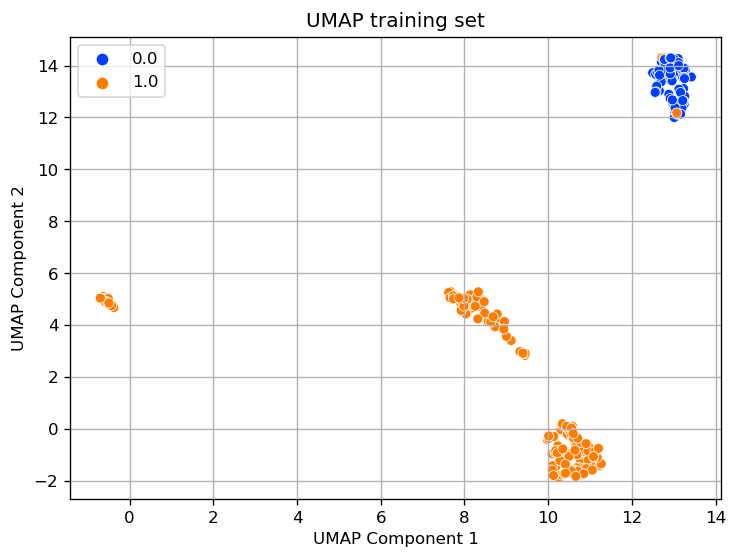

In [317]:
plt.figure(figsize = (7, 5), dpi=120)
sns.scatterplot(x='x', y='y', hue='activity_label', data=plot_umap_desc_train, palette='bright')
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.grid()
plt.legend()
plt.title('UMAP training set', fontsize=12)
plt.show()

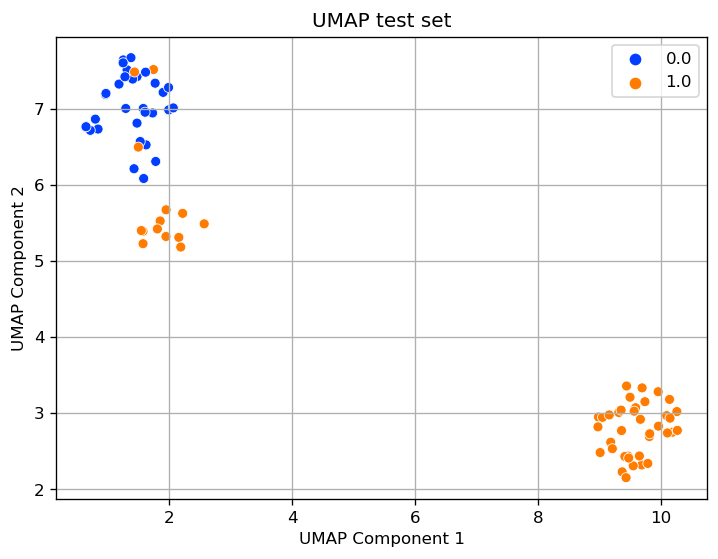

In [318]:
plt.figure(figsize = (7, 5), dpi=120)
sns.scatterplot(x='x', y='y', hue='activity_label', data=plot_umap_desc_test, palette='bright')
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.grid()
plt.legend()
plt.title('UMAP test set', fontsize=12)
plt.show()

Optimize Hyperparameter

In [319]:
import sklearn
import sklearn.model_selection
import optuna #optimize hyperparameter

SVM Param Optimization

In [320]:
def objective_SVC(trial):
    
    X, y = selected_feature_train_x, feature_train_y


    param = {
    'C' : trial.suggest_float('C', 1e-14, 1e4, log=True),
    'kernel' : trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf']),
    'gamma' : trial.suggest_categorical('gamma', ['scale', 'auto']),
    'degree' : trial.suggest_int('degree', 1, 3),
    }
    
    classifier_obj = svm.SVC(**param)
        
    score = sklearn.model_selection.cross_val_score(classifier_obj, X, y, cv=5)
    accuracy = score.mean()
    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction='maximize')#, sampler=optuna.samplers.RandomSampler(seed=42))
    study.optimize(objective_SVC, n_trials=20)
    
    print('Best trial:', study.best_trial)
    print('Best Parameter:', study.best_params)
    print('Best value:', study.best_value)

[I 2023-08-31 14:20:50,997] A new study created in memory with name: no-name-5e41b2f1-a93a-4f68-a9a9-d0e8db31ee02
[I 2023-08-31 14:20:51,017] Trial 0 finished with value: 0.6913461538461538 and parameters: {'C': 9.194830196240209e-13, 'kernel': 'linear', 'gamma': 'auto', 'degree': 3}. Best is trial 0 with value: 0.6913461538461538.
[I 2023-08-31 14:20:51,033] Trial 1 finished with value: 0.9567788461538462 and parameters: {'C': 1.8546581898170842, 'kernel': 'poly', 'gamma': 'auto', 'degree': 2}. Best is trial 1 with value: 0.9567788461538462.
[I 2023-08-31 14:20:51,052] Trial 2 finished with value: 0.6913461538461538 and parameters: {'C': 4.923628158038584e-14, 'kernel': 'poly', 'gamma': 'scale', 'degree': 2}. Best is trial 1 with value: 0.9567788461538462.
[I 2023-08-31 14:20:51,069] Trial 3 finished with value: 0.6913461538461538 and parameters: {'C': 2.8665093041713815e-13, 'kernel': 'linear', 'gamma': 'auto', 'degree': 2}. Best is trial 1 with value: 0.9567788461538462.
[I 2023-08-

Best trial: FrozenTrial(number=12, state=TrialState.COMPLETE, values=[0.9753846153846155], datetime_start=datetime.datetime(2023, 8, 31, 14, 20, 51, 219899), datetime_complete=datetime.datetime(2023, 8, 31, 14, 20, 51, 238689), params={'C': 0.08347313813743917, 'kernel': 'poly', 'gamma': 'scale', 'degree': 1}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'C': FloatDistribution(high=10000.0, log=True, low=1e-14, step=None), 'kernel': CategoricalDistribution(choices=('linear', 'poly', 'rbf')), 'gamma': CategoricalDistribution(choices=('scale', 'auto')), 'degree': IntDistribution(high=3, log=False, low=1, step=1)}, trial_id=12, value=None)
Best Parameter: {'C': 0.08347313813743917, 'kernel': 'poly', 'gamma': 'scale', 'degree': 1}
Best value: 0.9753846153846155


In [321]:
splits_feature = [selected_feature_train_x, selected_feature_test_x, feature_train_y, feature_test_y]

Accuracy: 0.96341
Sensitivity: 0.94118
Specificity: 1.00000
AUC: 0.95446
Confusion Matrix: [[31  0]
 [ 3 48]]


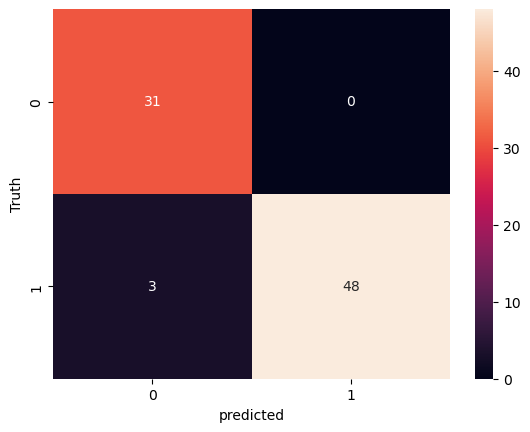

In [322]:
selected_model_SVC = svm.SVC(**study.best_params, probability=True)

performance_measures = model_training_and_validation_feature(selected_model_SVC, "model", splits_feature)

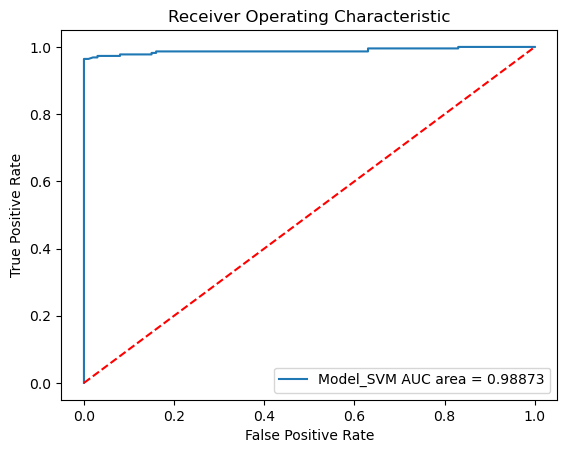

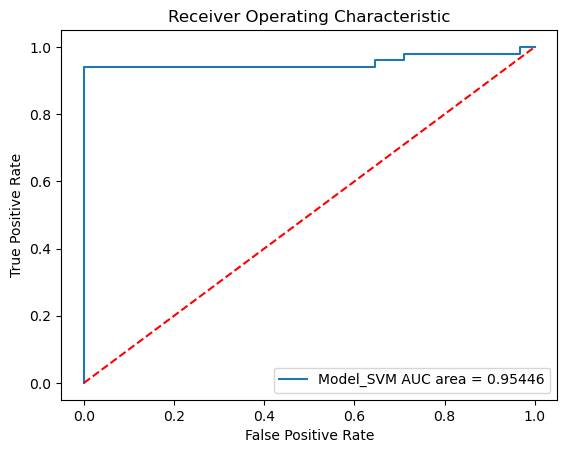

In [323]:
models = [{"label": "Model_SVM", "model": selected_model_SVC}]

plot_curve_functions_feature(models, selected_feature_train_x, feature_train_y)
plot_curve_functions_feature(models, selected_feature_test_x, feature_test_y)

Random Forest Param Optimization

In [324]:
def objective_RF(trial):
    
    X, y = selected_feature_train_x, feature_train_y
    
    param = {
    'max_depth' : trial.suggest_int('max_depth', 2, 20, log=True),
    'n_estimators' : trial.suggest_int('n_estimators', 2, 100),
    'criterion' : trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss']),
    }
    
    classifier_obj = RandomForestClassifier(**param)
        
    score = sklearn.model_selection.cross_val_score(classifier_obj, X, y, n_jobs=-1, cv=5)
    accuracy = score.mean()
    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction='maximize')#, sampler=optuna.samplers.RandomSampler(seed=42))
    study.optimize(objective_RF, n_trials=20)
    
    print('Best Parameter:', study.best_params)
    print('Best value:', study.best_value)

[I 2023-08-31 14:20:51,915] A new study created in memory with name: no-name-a4eacf56-9ddc-4d92-97b0-0f801945c8a1
[I 2023-08-31 14:20:51,971] Trial 0 finished with value: 0.9629326923076924 and parameters: {'max_depth': 3, 'n_estimators': 17, 'criterion': 'log_loss'}. Best is trial 0 with value: 0.9629326923076924.
[I 2023-08-31 14:20:52,064] Trial 1 finished with value: 0.9721634615384616 and parameters: {'max_depth': 16, 'n_estimators': 32, 'criterion': 'entropy'}. Best is trial 1 with value: 0.9721634615384616.
[I 2023-08-31 14:20:52,174] Trial 2 finished with value: 0.9691826923076924 and parameters: {'max_depth': 2, 'n_estimators': 51, 'criterion': 'gini'}. Best is trial 1 with value: 0.9721634615384616.
[I 2023-08-31 14:20:52,314] Trial 3 finished with value: 0.9753846153846155 and parameters: {'max_depth': 2, 'n_estimators': 70, 'criterion': 'gini'}. Best is trial 3 with value: 0.9753846153846155.
[I 2023-08-31 14:20:52,500] Trial 4 finished with value: 0.9691826923076924 and pa

Best Parameter: {'max_depth': 2, 'n_estimators': 70, 'criterion': 'gini'}
Best value: 0.9753846153846155


Accuracy: 0.96341
Sensitivity: 0.94118
Specificity: 1.00000
AUC: 0.96711
Confusion Matrix: [[31  0]
 [ 3 48]]


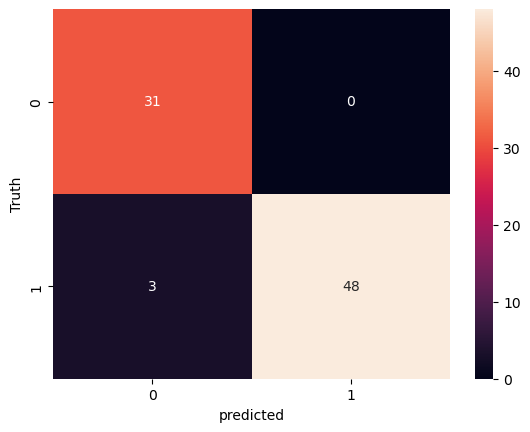

In [325]:
selected_model_RF = RandomForestClassifier(**study.best_params)

performance_measures = model_training_and_validation_feature(selected_model_RF, "model", splits_feature)

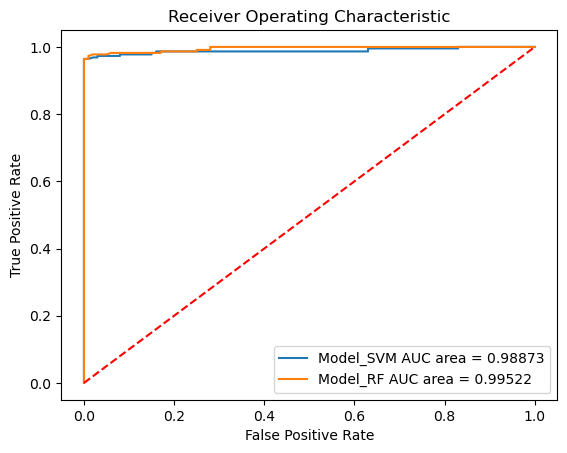

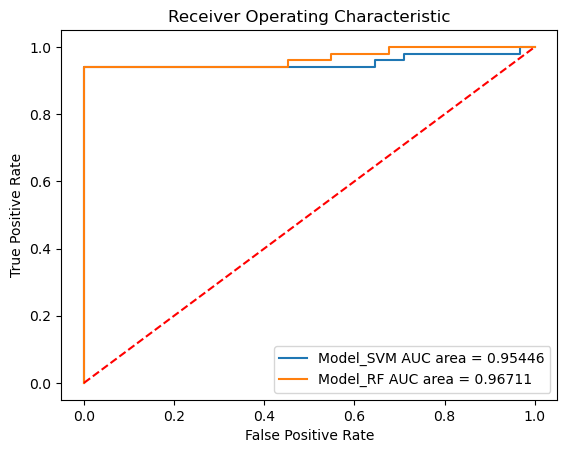

In [326]:
models.append({"label": "Model_RF", "model": selected_model_RF})

plot_curve_functions_feature(models, selected_feature_train_x, feature_train_y)
plot_curve_functions_feature(models, selected_feature_test_x, feature_test_y)

Gradient Boosting Param Optimization

In [327]:
def objective_GB(trial):
    
    X, y = selected_feature_train_x, feature_train_y
    
    param = {
    'learning_rate' : trial.suggest_float('learning_rate', 0.0, 0.2),
    'n_estimators' : trial.suggest_int('n_estimators', 1, 100),
    'criterion' : trial.suggest_categorical('criterion', ['friedman_mse', 'squared_error']),
    'max_depth' : trial.suggest_int('max_depth', 1, 5),
    'ccp_alpha' : trial.suggest_float('ccp_alpha', 0.0, 1.0)
    }
    
    classifier_obj = GradientBoostingClassifier(**param)
    
    score = sklearn.model_selection.cross_val_score(classifier_obj, X, y, n_jobs=-1, cv=5)
    
    accuracy = score.mean()
        
    return accuracy

if __name__ == "__main__":
    study = optuna.create_study(direction='maximize')#, sampler=optuna.samplers.RandomSampler(seed=42))
    study.optimize(objective_GB, n_trials=20)
    print('Best Parameter:', study.best_params)
    print('Best value:', study.best_value)

[I 2023-08-31 14:20:54,894] A new study created in memory with name: no-name-674d7f88-8350-4cde-b697-98d1ffc9ac63
[I 2023-08-31 14:20:55,102] Trial 0 finished with value: 0.6913461538461538 and parameters: {'learning_rate': 0.1511006217207681, 'n_estimators': 26, 'criterion': 'squared_error', 'max_depth': 5, 'ccp_alpha': 0.2848557059238759}. Best is trial 0 with value: 0.6913461538461538.
[I 2023-08-31 14:20:55,442] Trial 1 finished with value: 0.6913461538461538 and parameters: {'learning_rate': 0.015947708526276562, 'n_estimators': 49, 'criterion': 'friedman_mse', 'max_depth': 5, 'ccp_alpha': 0.94594609208453}. Best is trial 0 with value: 0.6913461538461538.
[I 2023-08-31 14:20:55,833] Trial 2 finished with value: 0.9660096153846155 and parameters: {'learning_rate': 0.12006609627295312, 'n_estimators': 69, 'criterion': 'friedman_mse', 'max_depth': 3, 'ccp_alpha': 0.0039422578257227725}. Best is trial 2 with value: 0.9660096153846155.
[I 2023-08-31 14:20:56,111] Trial 3 finished with 

Best Parameter: {'learning_rate': 0.12006609627295312, 'n_estimators': 69, 'criterion': 'friedman_mse', 'max_depth': 3, 'ccp_alpha': 0.0039422578257227725}
Best value: 0.9660096153846155


Accuracy: 0.96341
Sensitivity: 0.94118
Specificity: 1.00000
AUC: 0.95920
Confusion Matrix: [[31  0]
 [ 3 48]]


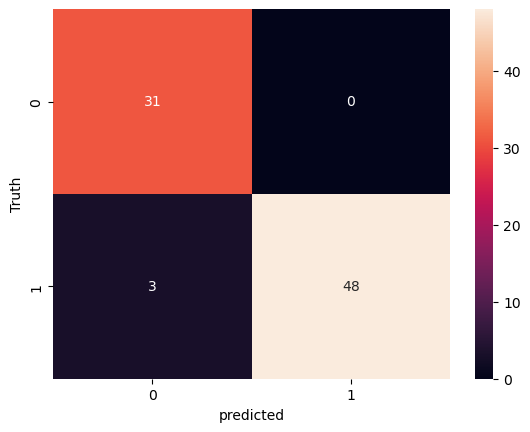

In [328]:
selected_model_GB = GradientBoostingClassifier(**study.best_params)

performance_measures = model_training_and_validation_feature(selected_model_GB, "model", splits_feature)

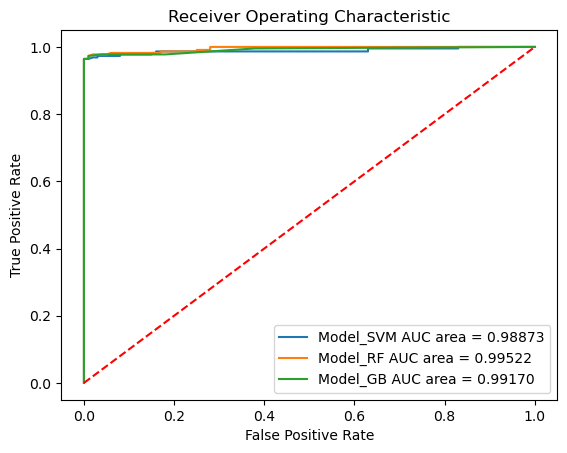

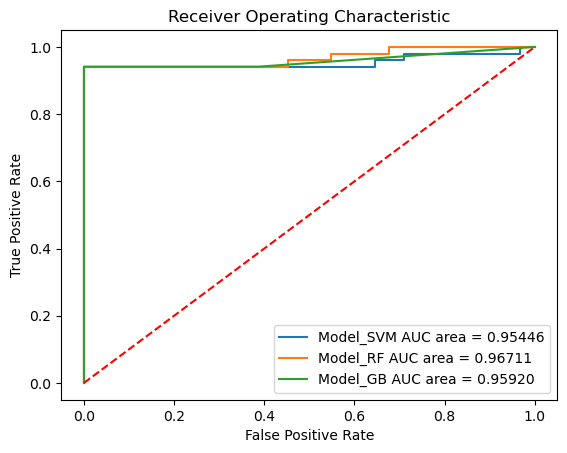

In [329]:
models.append({"label": "Model_GB", "model": selected_model_GB})

plot_curve_functions_feature(models, selected_feature_train_x, feature_train_y)
plot_curve_functions_feature(models, selected_feature_test_x, feature_test_y)

Neural Network Param Optimization

In [330]:
def objective_NN(trial):
    
    X, y = selected_feature_train_x, feature_train_y
    
    param = {
    'solver' : 'lbfgs', #For small dataset
    'hidden_layer_sizes' : trial.suggest_int('hidden_layer_sizes', 2, 100),
    'activation' : trial.suggest_categorical('activation', ['identity', 'logistic', 'tanh', 'relu']),
    'alpha' : trial.suggest_float('alpha', 1e-4, 1, log=True)
    }
    
    classifier_obj = MLPClassifier(**param)
    
    score = sklearn.model_selection.cross_val_score(classifier_obj, X, y, n_jobs=-1, cv=5)
    accuracy = score.mean()
    return accuracy

if __name__ == "__main__":
    study = optuna.create_study(direction='maximize')#, sampler=optuna.samplers.RandomSampler(seed=42))
    study.optimize(objective_NN, n_trials=20)
    print('Best Parameter:', study.best_params)
    print('Best value:', study.best_value)

[I 2023-08-31 14:21:02,389] A new study created in memory with name: no-name-ef5fd3c5-e129-46da-9e68-81c05471c9e2
[I 2023-08-31 14:21:02,614] Trial 0 finished with value: 0.9628365384615385 and parameters: {'hidden_layer_sizes': 96, 'activation': 'tanh', 'alpha': 0.000837134628919956}. Best is trial 0 with value: 0.9628365384615385.
[I 2023-08-31 14:21:02,707] Trial 1 finished with value: 0.9598557692307693 and parameters: {'hidden_layer_sizes': 80, 'activation': 'logistic', 'alpha': 0.04173584683656504}. Best is trial 0 with value: 0.9628365384615385.
[I 2023-08-31 14:21:02,879] Trial 2 finished with value: 0.9629326923076924 and parameters: {'hidden_layer_sizes': 50, 'activation': 'relu', 'alpha': 0.0003482677217386595}. Best is trial 2 with value: 0.9629326923076924.
[I 2023-08-31 14:21:02,989] Trial 3 finished with value: 0.9598557692307693 and parameters: {'hidden_layer_sizes': 88, 'activation': 'logistic', 'alpha': 0.04146283350713645}. Best is trial 2 with value: 0.9629326923076

Best Parameter: {'hidden_layer_sizes': 68, 'activation': 'relu', 'alpha': 0.002396828050427462}
Best value: 0.9660576923076925


c:\Users\supak\anaconda3\envs\my-rdkit-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.96341
Sensitivity: 0.94118
Specificity: 1.00000
AUC: 0.95319
Confusion Matrix: [[31  0]
 [ 3 48]]


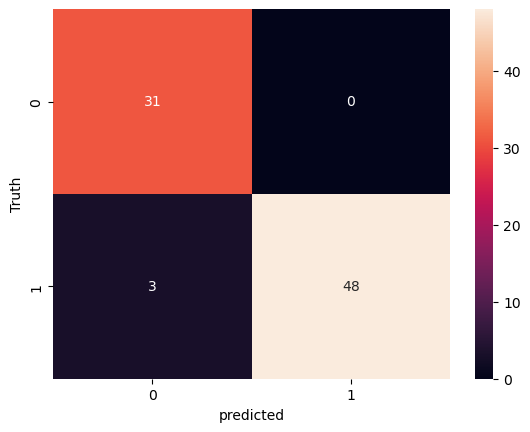

In [331]:
selected_model_ANN = MLPClassifier(**study.best_params)

performance_measures = model_training_and_validation_feature(selected_model_ANN, "ANN", splits_feature)

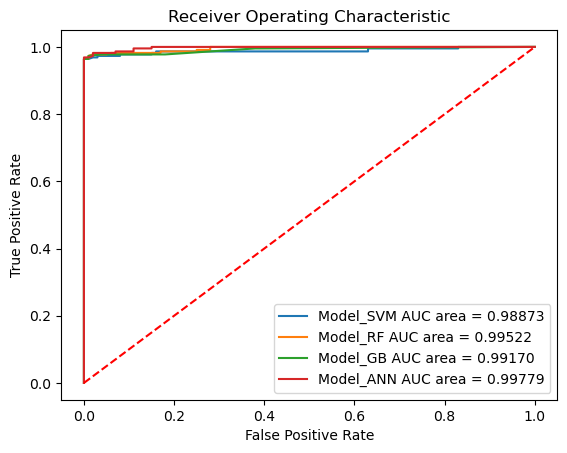

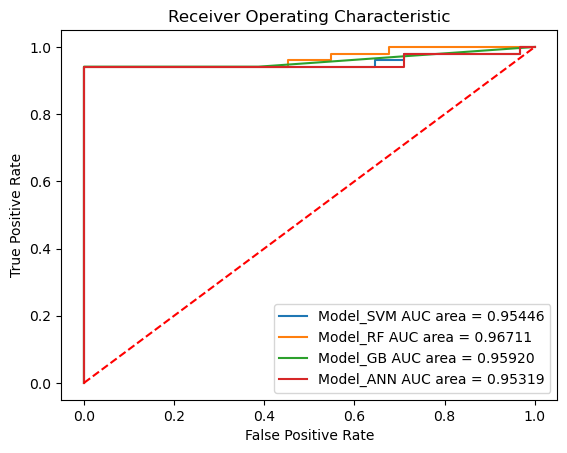

In [332]:
models.append({"label": "Model_ANN", "model": selected_model_ANN})

plot_curve_functions_feature(models, selected_feature_train_x, feature_train_y)
plot_curve_functions_feature(models, selected_feature_test_x, feature_test_y)

XGBoost Param Optimization

In [333]:
import xgboost as xgb

In [334]:
def objective_xgb(trial):
    
    X, y = selected_feature_train_x, feature_train_y
    
    dtrain = xgb.DMatrix(selected_feature_train_x, label=feature_train_y)
    dtest = xgb.DMatrix(selected_feature_test_x, label=feature_test_y)
    
    param = {
        "verbosity": 0,
        "objective": "binary:logistic",
        # use exact for small dataset.
        "tree_method": "exact",
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
    }

    if param["booster"] in ["gbtree", "dart"]:
        # maximum depth of the tree, signifies complexity of the tree.
        param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
        # minimum child weight, larger the term more conservative the tree.
        param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        # defines how selective algorithm is.
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)
        
    classifier_obj = xgb.XGBClassifier(**param)
    #bst = xgb.train(param, dtrain)
    #preds = bst.predict(dtest)
    #pred_labels = np.rint(preds)
    #accuracy = sklearn.metrics.accuracy_score(feature_test_y, pred_labels)
    score = sklearn.model_selection.cross_val_score(classifier_obj, X, y, n_jobs=-1, cv=5)
    accuracy = score.mean()
    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")#, sampler=optuna.samplers.RandomSampler(seed=42))
    study.optimize(objective_xgb, n_trials=20, timeout=600)
    
    print('Best Parameter:', study.best_params)
    print('Best value:', study.best_value)
    
    print("Number of finished trials: ", len(study.trials))
    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))
    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))


[I 2023-08-31 14:21:06,030] A new study created in memory with name: no-name-76c9cb72-398b-4648-a0a7-478edf34f1ef
[I 2023-08-31 14:21:06,066] Trial 0 finished with value: 0.9660096153846155 and parameters: {'booster': 'gblinear', 'lambda': 0.0005455519837885545, 'alpha': 0.0015601153203006722, 'subsample': 0.41137036139500816, 'colsample_bytree': 0.29044564154385655}. Best is trial 0 with value: 0.9660096153846155.
[I 2023-08-31 14:21:06,112] Trial 1 finished with value: 0.9567788461538462 and parameters: {'booster': 'gblinear', 'lambda': 7.156452423830832e-06, 'alpha': 2.8018779665062384e-08, 'subsample': 0.9633991384438665, 'colsample_bytree': 0.7161682180432931}. Best is trial 0 with value: 0.9660096153846155.
[I 2023-08-31 14:21:06,205] Trial 2 finished with value: 0.9691826923076924 and parameters: {'booster': 'gbtree', 'lambda': 2.9972562453066174e-05, 'alpha': 3.7765431633611526e-06, 'subsample': 0.6911285115442679, 'colsample_bytree': 0.4012838457143649, 'max_depth': 3, 'min_ch

Best Parameter: {'booster': 'gblinear', 'lambda': 0.00024349186454320615, 'alpha': 0.02480820020205842, 'subsample': 0.29029784249802226, 'colsample_bytree': 0.32127443552362095}
Best value: 0.9753846153846155
Number of finished trials:  20
Best trial:
  Value: 0.9753846153846155
  Params: 
    booster: gblinear
    lambda: 0.00024349186454320615
    alpha: 0.02480820020205842
    subsample: 0.29029784249802226
    colsample_bytree: 0.32127443552362095


Train model using training set

[14:21:09] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "colsample_bytree", "subsample" } are not used.

Accuracy: 0.96341
Sensitivity: 0.94118
Specificity: 1.00000
AUC: 0.96110
Confusion Matrix: [[31  0]
 [ 3 48]]


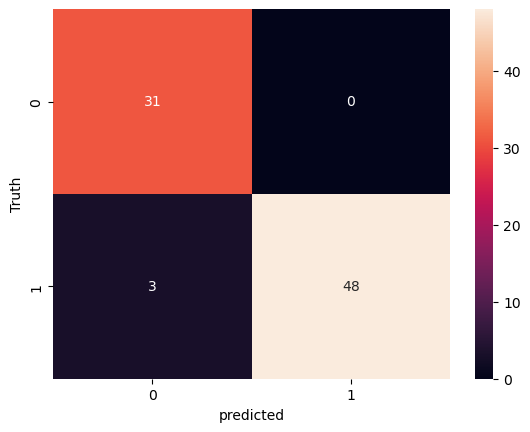

In [335]:
selected_model_3 = xgb.XGBClassifier(**study.best_params)

performance_measures = model_training_and_validation_feature(selected_model_3, "XGB", splits_feature)

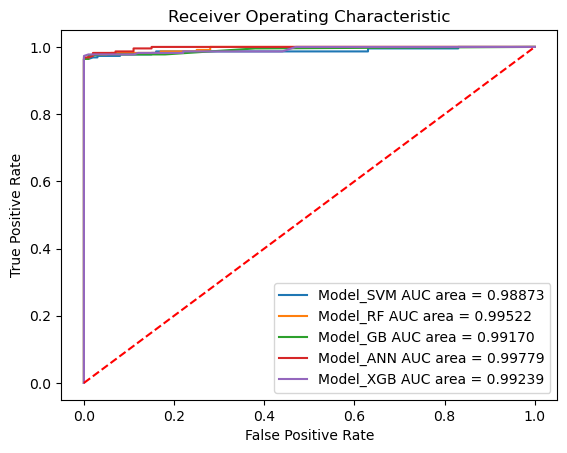

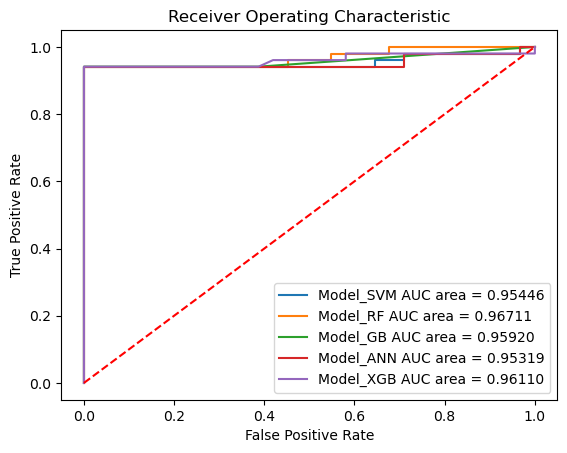

In [336]:
models.append({"label": "Model_XGB", "model": selected_model_3})

plot_curve_functions_feature(models, selected_feature_train_x, feature_train_y)
plot_curve_functions_feature(models, selected_feature_test_x, feature_test_y)

In [337]:
#feature_importance_GB = pd.Series(model_GB_feature.feature_importances_, index=rdkit_gpr6.columns).sort_values(ascending=False)
#feature_importance_GB.head(10)

Hyperparameter Searching

In [338]:
#def report_best_scores(results, n_top=3):
#    for i in range(1, n_top + 1):
#        candidates = np.flatnonzero(results['rank_test_score'] == i)
#        for candidate in candidates:
#            print("Model with rank: {0}".format(i))
#            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
#                  results['mean_test_score'][candidate],
#                  results['std_test_score'][candidate]))
#            print("Parameters: {0}".format(results['params'][candidate]))
#            print("")